In [47]:
def evaluate_classifier(w,b,x):
    if (np.dot(w,x)+b)>0:
        return 1
    if (np.dot(w,x)+b)<0:
        return -1
    return 0

In [48]:
def train_perceptron(x,y,n_iters):
    n,d=x.shape
    w=np.zeros((d,))
    b=0
    done = False
    converged = True
    iters = 0
    np.random.seed(None)
    while not (done):
        
        done = True
        I=np.random.permutation(n)
        
        for i in range(n):
            j=I[i]
            
            if (evaluate_classifier(w,b,x[j,:])!=y[j]) :
                w=w+y[j]*x[j,:]
                b=b+y[j]
                done = False
                
        iters=iters+1
        
        if iters > n_iters:
            done = True
            converged = False
    if converged:
        print ("Perceptron algorithm: iterations until convergence: ", iters)
    else:
        print ("Perceptron algorithm: did not converge within the specified number of iterations")
    return w, b, converged
    
        
    

In [49]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)


In [50]:
def run_perceptron(datafile):
    data=np.loadtxt(datafile)
    
    n,d=data.shape
    x=data[:,0:2]
    y=data[:,2]
    
    w,b,converged = train_perceptron(x,y,1000)
    
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    
    
    plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
    plt.plot(x[(y==-1),0], x[(y==-1),1], 'k^')
    
    
    if converged:
        grid_spacing = 0.05
        xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
        grid = np.c_[xx1.ravel(), xx2.ravel()]
        Z = np.array([evaluate_classifier(w,b,pt) for pt in grid])
        # Show the classifier's boundary using a color plot
        Z = Z.reshape(xx1.shape)
        plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)
    plt.show()
    
    

Perceptron algorithm: iterations until convergence:  14


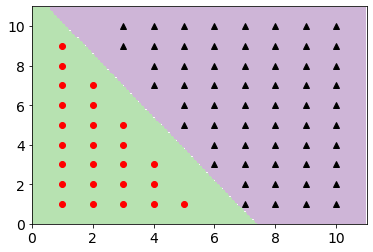

In [51]:
run_perceptron('data_1.txt')

Perceptron algorithm: did not converge within the specified number of iterations


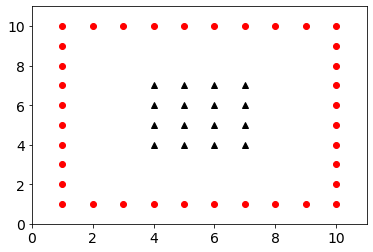

In [52]:
run_perceptron('data_2.txt')